In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\ndogue85\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
palu=pd.read_excel('C:/Users/ndogue85/Documents/these/code_oython_these/Consultation_palu_2008n.xlsx')

In [3]:
palu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 32 columns):
N°                           7417 non-null int64
N°1                          6916 non-null float64
Poste de santé ou hopital    7417 non-null object
Date_Consultation            7405 non-null object
NumOrdre                     6604 non-null float64
Agemois                      442 non-null float64
Ageannee                     6897 non-null float64
Sexe                         7394 non-null object
NumVil                       5480 non-null float64
PSP_2008                     7417 non-null int64
Adresse_exacte               7369 non-null object
Plaintes_signes_symptomes    7232 non-null object
TEMP1                        7417 non-null int64
TENS                         0 non-null float64
T_Digestif                   7417 non-null int64
DOULEUR ABDOMINALE           7417 non-null int64
MYALGIE                      7417 non-null int64
NAUSEE                       7417 non-null int6

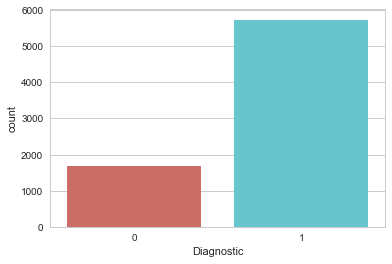

In [4]:
sns.countplot(x=palu['Diagnostic'],data=palu, palette='hls')
plt.show()

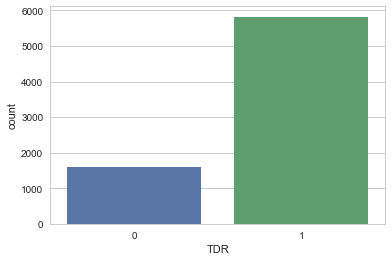

In [5]:
sns.countplot(x=palu['TDR'], data=palu)
plt.show()

In [6]:
paluu=pd.DataFrame(palu, columns =['TEMP1','T_Digestif','DOULEUR ABDOMINALE','MYALGIE','NAUSEE','FATIGUE','M_APPETIT','VERTIGE','FRISSON','MAUX DE TETE','TOUX','VOMISSEMENT','FIEVRE','CEPHALEE','TDR'])

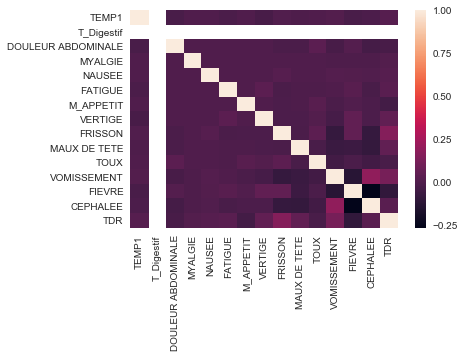

In [7]:
sns.heatmap(paluu.corr())
plt.show()

In [8]:

# Nous séparons notre jeu données palu en deux parties. Une partie pour entrainer X_train et un partie pour tester X_test
# Nous séparons notre variable cible en deux parties. Une partie pour entrainer y_train et une partie pour tester y_test
X = paluu
y = palu['Diagnostic']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
X_train.shape
#y_train.shape

(5562, 15)

In [10]:
palu_classifier = LogisticRegression(random_state=0)
palu_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
#Calcule de la précision du modele
palu_pred = palu_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, palu_pred)
print(confusion_matrix)

[[ 223  188]
 [  53 1391]]


In [12]:
print('La precision de la regression logistique sur les données de test  : {:.2f}'.format(palu_classifier.score(X_test, y_test)*100))

La precision de la regression logistique sur les données de test  : 87.01


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, palu_pred))

             precision    recall  f1-score   support

          0       0.81      0.54      0.65       411
          1       0.88      0.96      0.92      1444

avg / total       0.86      0.87      0.86      1855



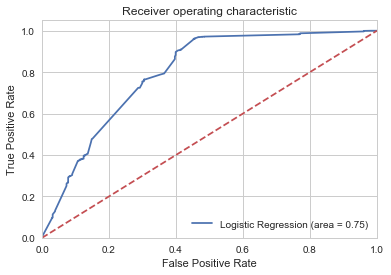

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, palu_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, palu_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Suréchantillonnage avec l'algorithme SMOTE

In [15]:
X1 = paluu
y1 =palu['Diagnostic']
from imblearn.over_sampling import SMOTE
Re= SMOTE(random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
columns = X1_train.columns
Re_data_X1,Re_data_y1=Re.fit_sample(X1_train, y1_train)
Re_data_X1 = pd.DataFrame(data=Re_data_X1,columns=columns )

In [16]:
Re_data_X1.head()

,TEMP1,T_Digestif,DOULEUR ABDOMINALE,MYALGIE,NAUSEE,FATIGUE,M_APPETIT,VERTIGE,FRISSON,MAUX DE TETE,TOUX,VOMISSEMENT,FIEVRE,CEPHALEE,TDR
0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


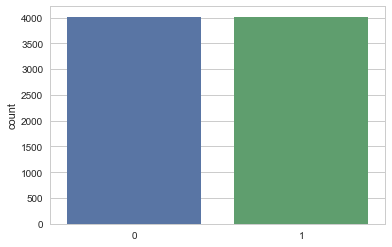

In [17]:
sns.countplot(x=Re_data_y1, data=Re_data_X1)
plt.show()

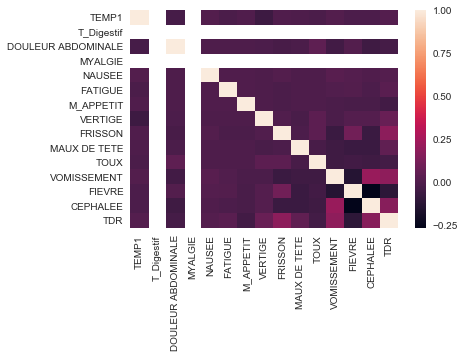

In [18]:
sns.heatmap(Re_data_X1.corr())
plt.show()

In [22]:
# Nous séparons notre jeu données palu en deux parties. Une partie pour entrainer X_train et un partie pour tester X_test
# Nous séparons notre variable cible en deux parties. Une partie pour entrainer y_train et une partie pour tester y_test
X = Re_data_X1
y = Re_data_y1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
#Fit logistic regression to the training set
palu_classifier = LogisticRegression(random_state=0)
palu_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
palu_pred = palu_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, palu_pred)
print(confusion_matrix)

[[629 387]
 [118 874]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, palu_pred))

             precision    recall  f1-score   support

          0       0.84      0.62      0.71      1016
          1       0.69      0.88      0.78       992

avg / total       0.77      0.75      0.74      2008



In [26]:
print('La precision de la regression logistique sur les données de test  : {:.2f}'.format(palu_classifier.score(X_test, y_test)*100))

La precision de la regression logistique sur les données de test  : 74.85


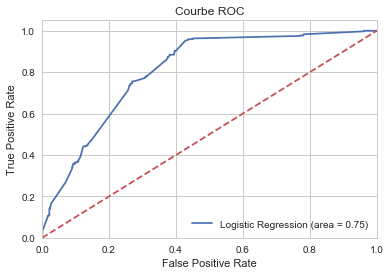

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, palu_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, palu_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# SVM avec kernel=sigmoid

In [32]:
dt1 = Re_data_X1
y1 = Re_data_y1
from sklearn.model_selection import train_test_split
dt1_train,dt1_test,y_train,y_test=train_test_split(dt1,y1, test_size=0.20)
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(dt1_train, y_train)  
y_pred = svclassifier.predict(dt1_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[  0 845]
 [  0 762]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       845
          1       0.47      1.00      0.64       762

avg / total       0.22      0.47      0.31      1607



C:\Users\ndogue85\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM avec kernel=sigmoid

In [33]:
dt1 = Re_data_X1
y1 = Re_data_y1
from sklearn.model_selection import train_test_split
dt1_train,dt1_test,y_train,y_test=train_test_split(dt1,y1, test_size=0.20)
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(dt1_train, y_train)  
y_pred = svclassifier.predict(dt1_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))


[[  0 827]
 [  0 780]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       827
          1       0.49      1.00      0.65       780

avg / total       0.24      0.49      0.32      1607



C:\Users\ndogue85\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM avec kernel=polynom

In [34]:
dt1 = Re_data_X1
y1 = Re_data_y1
from sklearn.model_selection import train_test_split
dt1_train,dt1_test,y_train,y_test=train_test_split(dt1,y1, test_size=0.20)
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(dt1_train, y_train)  
y_pred = svclassifier.predict(dt1_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[463 296]
 [ 97 751]]
             precision    recall  f1-score   support

          0       0.83      0.61      0.70       759
          1       0.72      0.89      0.79       848

avg / total       0.77      0.76      0.75      1607



# SVM avec kernel=gaussian

In [28]:
dt1 = Re_data_X1
y1 = Re_data_y1
from sklearn.model_selection import train_test_split
dt1_train,dt1_test,y_train,y_test=train_test_split(dt1,y1, test_size=0.20)
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(dt1_train, y_train)  
y_pred = svclassifier.predict(dt1_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[454 361]
 [ 29 763]]
             precision    recall  f1-score   support

          0       0.94      0.56      0.70       815
          1       0.68      0.96      0.80       792

avg / total       0.81      0.76      0.75      1607

